## Unsupervised ML Python Homework

In [1]:
# Import library yang dibutuhkan

import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
data = pd.read_csv('unsupervised_ml_homework_data.csv')

### Soal 1: PCA

Instruksi:
1. Lakukan PCA pada data yang telah di-import di cell atas.
2. Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)
3. Berapa Principal Components yang diambil?
4. Simpan data hasil PCA karena data hasil PCA ini akan digunakan di Soal 2: K-Means

In [3]:
# Melihat data secara sekilas

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.737848,-1.646325,-7.810163,11.995504,-2.807248,-0.085124,2.255992,1.746520,-9.256078,1.693435,-19.772970,9.750907,4.551802,-7.251561,5.099425,2.270202,-8.097061,-6.058829,-3.268958,2.623776
1,-6.024396,-0.488319,4.315504,0.650888,-14.594512,-2.801084,10.649474,6.087658,10.845574,5.494591,10.725055,2.933646,-12.785655,-9.768811,-14.827223,-6.423245,8.097094,1.899088,0.376761,-3.531153
2,0.490949,-10.487436,-9.045535,0.129481,3.977727,-7.615191,-12.787071,6.416582,11.013078,-5.251267,-5.692146,0.834205,3.299760,3.082884,-5.425403,6.274120,-11.407726,-5.886591,3.365510,23.723555
3,-13.087377,7.845202,21.154323,7.971816,-13.379182,1.204298,5.592174,-3.450956,6.537270,5.360073,5.689761,3.148839,3.416195,-16.175695,1.531479,5.373013,1.643889,1.227602,3.878080,12.262810
4,-7.171991,13.705993,11.057470,14.073451,-7.947617,-4.637308,6.351615,-6.814010,-2.483272,4.279979,9.275197,-18.018556,-3.428444,-5.252267,-6.693149,-4.172268,6.079671,7.918299,5.047994,4.019611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.471686,12.940466,8.508031,19.479180,-3.637595,3.513321,12.118536,0.347570,5.111509,-3.054912,5.697629,7.516148,-10.959986,-8.098598,-5.641822,2.220350,12.026172,5.860314,3.439185,-0.963639
996,-7.518274,6.128470,11.750514,3.632682,-17.542199,-1.025005,10.457185,-5.062221,6.447733,1.171539,-2.275978,8.270251,-15.710402,-12.621179,-15.950729,-9.878082,12.856359,0.787886,3.381137,0.173625
997,8.765803,-10.063699,-2.102178,8.809839,-3.357467,-5.563186,1.583849,-0.648160,7.130244,-5.364986,-12.926855,-2.191091,18.516239,3.508759,-3.534441,8.934743,-15.085670,5.897779,-3.473376,8.841673
998,-0.688375,-2.251089,-16.099880,-5.961233,-2.604041,-12.876690,-23.101496,-4.899372,13.612339,-15.022254,-8.881761,-13.294057,11.791521,5.684052,-12.296774,-10.716805,-4.355119,-9.737902,12.584078,14.301682


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
dtypes: float64(20)
memory usage: 156.4 KB


Informasi yang didapat dari dataframe tersebut:
- Memiliki 1000 baris × 20 kolom
- Semuanya bertipe data float
- Tidak ada missing values

Asumsi yang saya gunakan:
- data tersebut "ready" untuk PCA sehingga tidak perlu melakukan data cleaning.
- data ini hanya digunakan untuk menentukan hasil PCA dan menentukan nilai k terbaik, bukan untuk melakukan prediksi.
- Karena itulah, 100% data saya gunakan untuk training sehingga tidak perlu membagi data train dan test
- Selain itu juga tidak perlu melakukan visualisasi PCA dan Clustering lebih lanjut

In [5]:
### lakukan PCA di sini

# Melakukan PCA pada data dengan threshold explained variancenya 0.8 (80%)
pca_80 = PCA(0.80)

# Mengetahui waktu yang dibutuhkan melatih model, jumlah Principal Components yang diambil, dan persen reduksi
start_time = time.time()
pca_80.fit(data)
data_pca_80 = pca_80.transform(data) 
finish_time = time.time()
print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Hanya tersisa:', pca_80.n_components_, 'feature columns setelah dlakukan PCA.')
print('PCA kali ini berhasil mereduksi dataset sebanyak', (1-(pca_80.n_components_/20))*100, 'persen')

PCA Fit and Transform finished in 1.8286306858062744 seconds.
Hanya tersisa: 12 feature columns setelah dlakukan PCA.
PCA kali ini berhasil mereduksi dataset sebanyak 40.0 persen


##### Jawab: Hasil PCA adalah mengambil 12 Principal Components.

### Soal 2: K Means

Instruksi:
1. Dari data yang sudah di-PCA-kan (jadi datanya sudah baru ya, bukan data original lagi, ingat, data yang sudah di-PCA-kan), kita akan menentukan k = ?? yang paling ideal untuk clustering.
2. Lakukan Elbow dan Silhouette method
3. Visualisasikan hasil Elbow dan Silhouette method
4. Berapa nilai k yang terbaik? 

In [6]:
# Membuat dataframe baru dari array hasil PCA sebelumnya
x = pd.DataFrame(data_pca_80)
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.489239,23.388822,-1.245327,-0.604663,7.168715,12.140433,-2.606712,-2.982270,-1.240097,0.661235,3.653253,1.176113
1,-16.927579,-21.720006,0.453236,-2.092276,-1.854185,8.105598,0.857659,2.890713,0.310611,-0.045326,-4.492495,4.243733
2,29.585439,-0.367065,8.009331,3.564103,3.851260,1.446380,8.451138,-9.789632,-3.855225,-1.684923,-3.405300,-8.356691
3,-18.107060,-8.676266,-0.009083,9.928400,2.647460,-2.341457,4.218565,1.104390,-2.239445,-1.504301,3.573772,-18.724099
4,-19.133698,-13.345589,-5.568956,-6.848398,-5.305273,-10.130572,-9.445192,0.368672,-7.123532,-2.462980,2.651811,-6.460466
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-27.596745,-5.675153,1.037456,2.060439,12.357932,-1.168417,-5.429511,-7.116851,2.629224,-3.142956,2.621997,-0.400097
996,-25.101230,-16.880265,-2.327276,0.339001,-0.856307,7.415144,3.238225,4.557121,-0.463356,-7.809110,3.039680,6.374570
997,23.515248,2.271175,5.068040,1.014359,12.138911,0.638384,-5.087893,-0.279657,1.870682,1.883865,-1.320213,-5.322234
998,32.730315,-4.069322,10.025550,0.286854,-16.406983,-5.374449,9.337272,5.613491,-0.188005,-8.060883,3.080424,2.834658


In [7]:
from sklearn.preprocessing import StandardScaler

# Elbow Method
score = []

# Mencoba setiap k dari 1 hingga 10 untuk mendapatkan nilai k terbaik
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    scaled_data = StandardScaler().fit_transform(x)
    kmeans.fit(scaled_data)
    score.append(kmeans.inertia_)

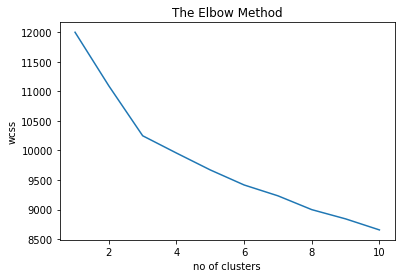

In [8]:
# Plot hasil score dari variasi nilai k
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Dapat dilihat pada grafik dengan menggunakan elbow method, didapatkan nilai k = 3 adalah yang terbaik.

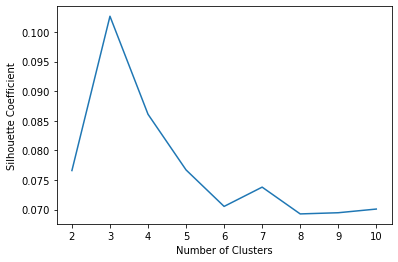

In [9]:
# Silhouette score
silhouette_coefficients = []
from sklearn.metrics import silhouette_score

# Mencoba setiap k dari 2 hingga 10 untuk mendapatkan nilai k terbaik
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    scaled_data = StandardScaler().fit_transform(x)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
# Plot hasil score dari variasi nilai k
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Dapat dilihat pada grafik dengan menggunakan silhouette method, didapatkan nilai k = 3 adalah yang terbaik.

##### Jawab: Nilai k yang terbaik berdasarkan Elbow dan Silhouette method adalah...k = 3